In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob
import numpy as np
import scipy as sp
import sys
#import pycountry
from langdetect import detect
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS
import os
from PIL import Image
from autocorrect import spell

import nltk
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import RegexpStemmer
from nltk.tokenize import word_tokenize


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB


In [73]:
df=pd.read_csv("restaurant.csv")

In [74]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [75]:
df.sample(20)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
611,2418404,bkrz5UP0PxomUjvi45nxRw,wmem9gMnkyg9WE1f1Ahn1w,RESDUcs7fIiihp38-d6_6g,5,0,0,0,Went in for a birthday dinner and loved every ...,2015-05-13 16:15:28
5462,2781576,tiOk977T5CXsQqUulc2Z2A,J5CTzhGQi-v9IYePTTZt7g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,Rated #1 buffet in NV for six consecutive year...,2018-10-02 18:07:34
9865,3171520,r18Du3BTxxdCstYEQ5d6lw,2eLw1j_EHrbHPKu8co8jTw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,This is my favorite buffet when I visit Las Ve...,2019-08-10 04:43:39
3299,2619094,ZjvIXFb0Q-5cYiwZr6gOIA,r1r0WqevZD0jUYrcJ0kNAQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,Best Buffet in all of Las Vegas! You won't be ...,2018-06-04 05:01:42
2735,2576583,66p3Dn3RgO9qe3WXQ2nOfA,YySgItMZ8hHNJFVID1lz3g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I absolutely love this buffet. However the lin...,2014-11-19 08:57:49
1014,2448800,5F1IL2t9kfjdnRFfqJYmWg,dfq4fEUzlDJztA99Yqx6Xg,RESDUcs7fIiihp38-d6_6g,5,12,9,13,Of course I had to save the best part of my tr...,2017-07-20 07:46:29
8675,3061064,xmsKZvKKSlT0VLfQLGLD8g,K5Eud0UrF9l9piKWBFmYvA,RESDUcs7fIiihp38-d6_6g,5,1,1,2,Wow! I don't know how I haven't written a revi...,2018-12-29 19:50:15
2450,2554634,MYXjVqauTQc0tPhNIm_OZg,Y1_IrJHkHyMAulJ-3hQG7Q,RESDUcs7fIiihp38-d6_6g,5,1,0,0,If you hate buffets the Bacchanal probably won...,2016-06-02 19:59:53
5748,2803059,cLxlzQz7eGIQ8QiYcPrvMQ,yaZvdeEnbZDjaBlG0hBDfQ,RESDUcs7fIiihp38-d6_6g,5,4,3,4,Don't you love when Vegas buffets raise in pri...,2016-06-07 19:43:18
7502,2949962,ojrL640DgpyeT6ljV6U77g,mgytZAasaiBf-END4aZD9w,RESDUcs7fIiihp38-d6_6g,5,59,39,48,"I don't normally buffet, but when I do... Bacc...",2015-04-14 04:50:33


In [76]:
df.describe()

,Unnamed: 0,stars,useful,funny,cool
count,1.041700e+04,10417.000000,10417.000000,10417.000000,10417.000000
mean,2.775377e+06,3.777671,1.419603,0.640875,0.759720
std,2.428654e+05,1.331451,4.875888,3.347964,4.125847
min,2.370338e+06,1.000000,0.000000,0.000000,0.000000
25%,2.566392e+06,3.000000,0.000000,0.000000,0.000000
50%,2.762536e+06,4.000000,0.000000,0.000000,0.000000
75%,2.975480e+06,5.000000,1.000000,0.000000,0.000000
max,3.220316e+06,5.000000,176.000000,159.000000,172.000000


In [77]:
df.columns.tolist()

['Unnamed: 0',
 'review_id',
 'user_id',
 'business_id',
 'stars',
 'useful',
 'funny',
 'cool',
 'text',
 'date']

In [78]:
df.stars.value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [80]:
df.shape

(10417, 10)

In [53]:
df.loc[df['stars']==3, 'sentiment']= 'nötr'
df.loc[df['stars']<3, 'sentiment']= 'negatif'
df.loc[df['stars']>3, 'sentiment']= 'pozitif'
df=df[["stars", "sentiment", "text"]]
df.head()

,stars,sentiment,text
0,5,pozitif,after getting food poisoning at the palms hote...
1,4,pozitif,a feast worthy of godsbaccarnal buffet in caes...
2,4,pozitif,the crab legs are better than the ones at wick...
3,1,negatif,not worth it too salty food and expensive this...
4,5,pozitif,i would give this infinite stars if i could my...


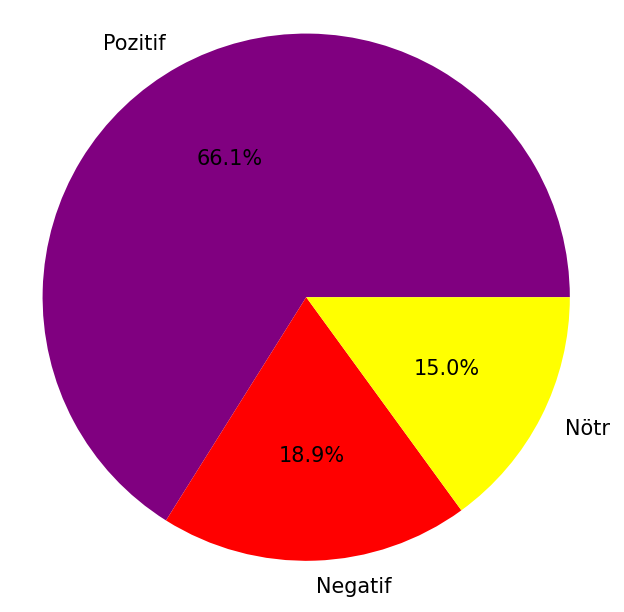

In [56]:
pie_sentiment=df.sentiment.value_counts(normalize=True)
plt.figure(figsize=(5,5), dpi=150),
labels='Pozitif', 'Negatif', 'Nötr'
colors=['purple', 'red', 'yellow']
plt.pie(pie_sentiment,colors=colors,labels=labels,autopct='%1.1f%%')
plt.axis('equal');

In [81]:
df['text']=df['text'].str.lower()                 #bütün sütunu küçük harfe çevirir
df['text']=df['text'].str.replace('[^\w\s]','')   #noktalama işaretlerini kaldırır
df['text']=df['text'].str.replace('[\d+]','')     #rakamları kaldırır
df['text']=df['text'].str.replace('[\n]','')      #yeni satırları kaldırır
df['text']=df['text'].str.replace('[\r]','')      #enter i kaldırır

In [82]:
df['language'] = df['text'].apply(detect)

In [83]:
df[df["language"]=="ja"].head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,language
1548,2487451,14fcUD0TESrPefsUKp8SbQ,9D4zCDnt8DH-OKBP8gWQjg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,高いけど メチャ美味しいし 品揃えも豊富で お料理一品一品の見た目もとても綺麗です 特に茹で...,2017-06-29 14:22:18,ja
7226,2927865,m-0ALRKIwwGLZpPtw9pBTA,sdoU9SMG0_7lmeDO6OlLFA,RESDUcs7fIiihp38-d6_6g,2,0,0,1,料理の種類は多いけど料理それぞれがやや雑な印象カニは殻が割り切れてなく食べにくい肉は焼き方が...,2017-07-28 07:41:58,ja
9645,3150026,mJ-7peyUjd1aJ-ZP1_BbYA,GVm4q4jy7pI1IyRz5vClBQ,RESDUcs7fIiihp38-d6_6g,5,2,0,2,ラスベガスに行ったらバッフェに少しお値段高めですがこちらは種類の多さ美味しさどれも良かったで...,2017-04-08 12:59:23,ja
9799,3165141,hlExosqrtVStxQgJKCkydg,vYNenZlmwIQc5fNVkfYW5Q,RESDUcs7fIiihp38-d6_6g,4,2,0,0,ラスベガスで一番美味しいと言われているバフェですランチで行ってきました種類が本当に豊富で驚き...,2015-05-24 06:47:14,ja
10044,3188603,DTa5PAizwbVixEzuPbtV0w,Ju24qIj28hE6o9NBVCxuGQ,RESDUcs7fIiihp38-d6_6g,2,1,0,0,ビュッフェスタイルのレストラン夜に分ほど並んでの入店です店内は非常に広くその広さを活かして様...,2018-09-10 18:03:33,ja


In [86]:
df = df[df["language"]=="en"]

In [93]:
df.sentiment.value_counts()

AttributeError: 'DataFrame' object has no attribute 'sentiment'

In [94]:
df.sentiment.value_counts(normalize=True)

AttributeError: 'DataFrame' object has no attribute 'sentiment'

In [91]:
df[['polarity', 'subjectivity']]= df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [92]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,language,polarity,subjectivity
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,en,0.337330,0.586926
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,en,0.219409,0.537292
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,en,-0.134722,0.731944
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,en,-0.325000,0.400000
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,en,0.362500,0.725000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,en,0.543750,0.481250
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,en,0.210101,0.586869
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,en,0.480000,0.630000
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,en,0.185185,0.533333


In [103]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [104]:
text1=df[df["stars"]==1]

Word Cloud Saved Successfully


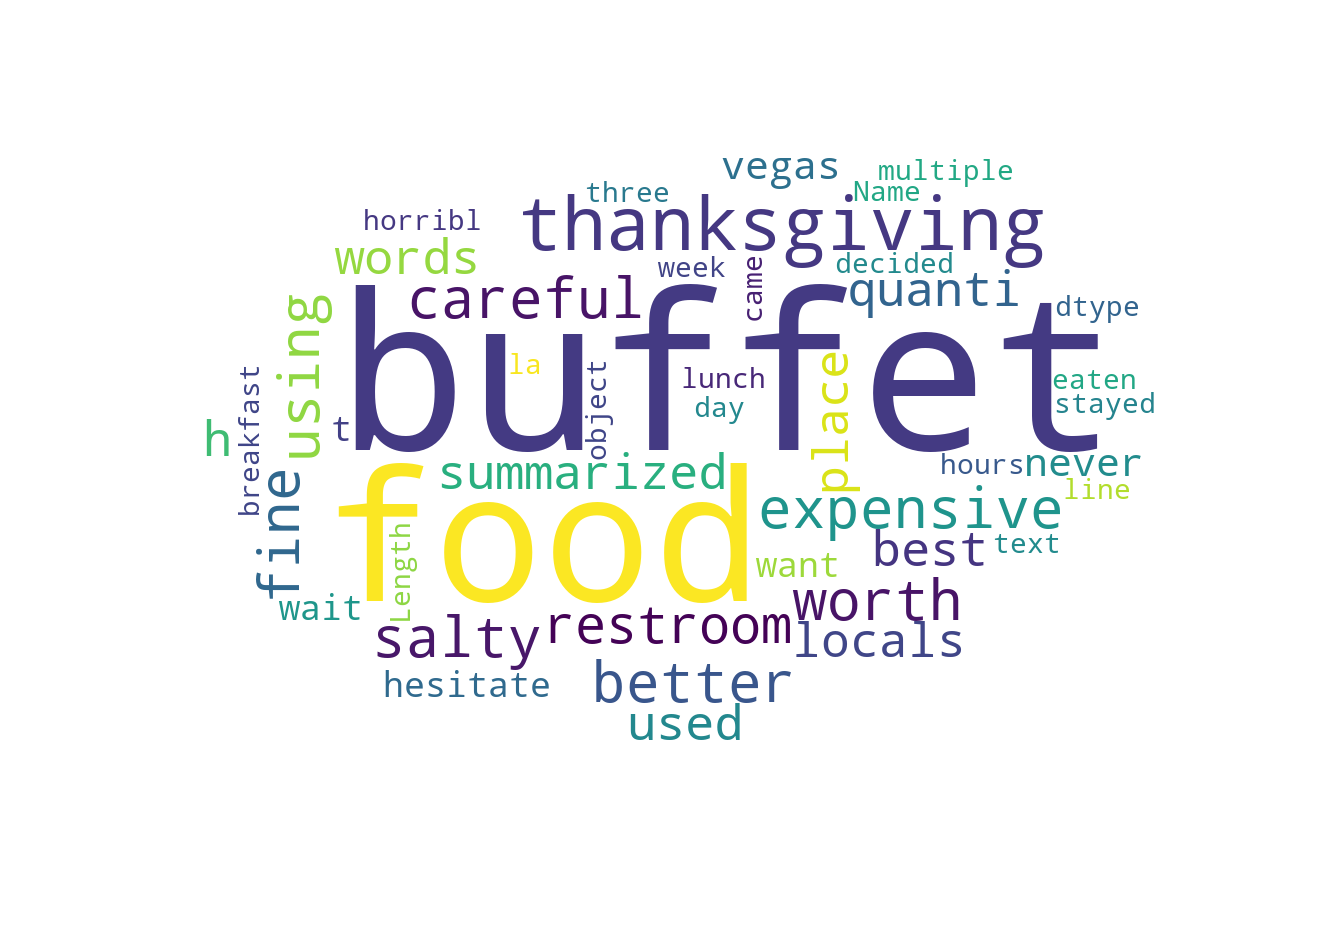

In [105]:
create_wordcloud(text1.text)

In [107]:
text5=df[df["stars"]==5]

Word Cloud Saved Successfully


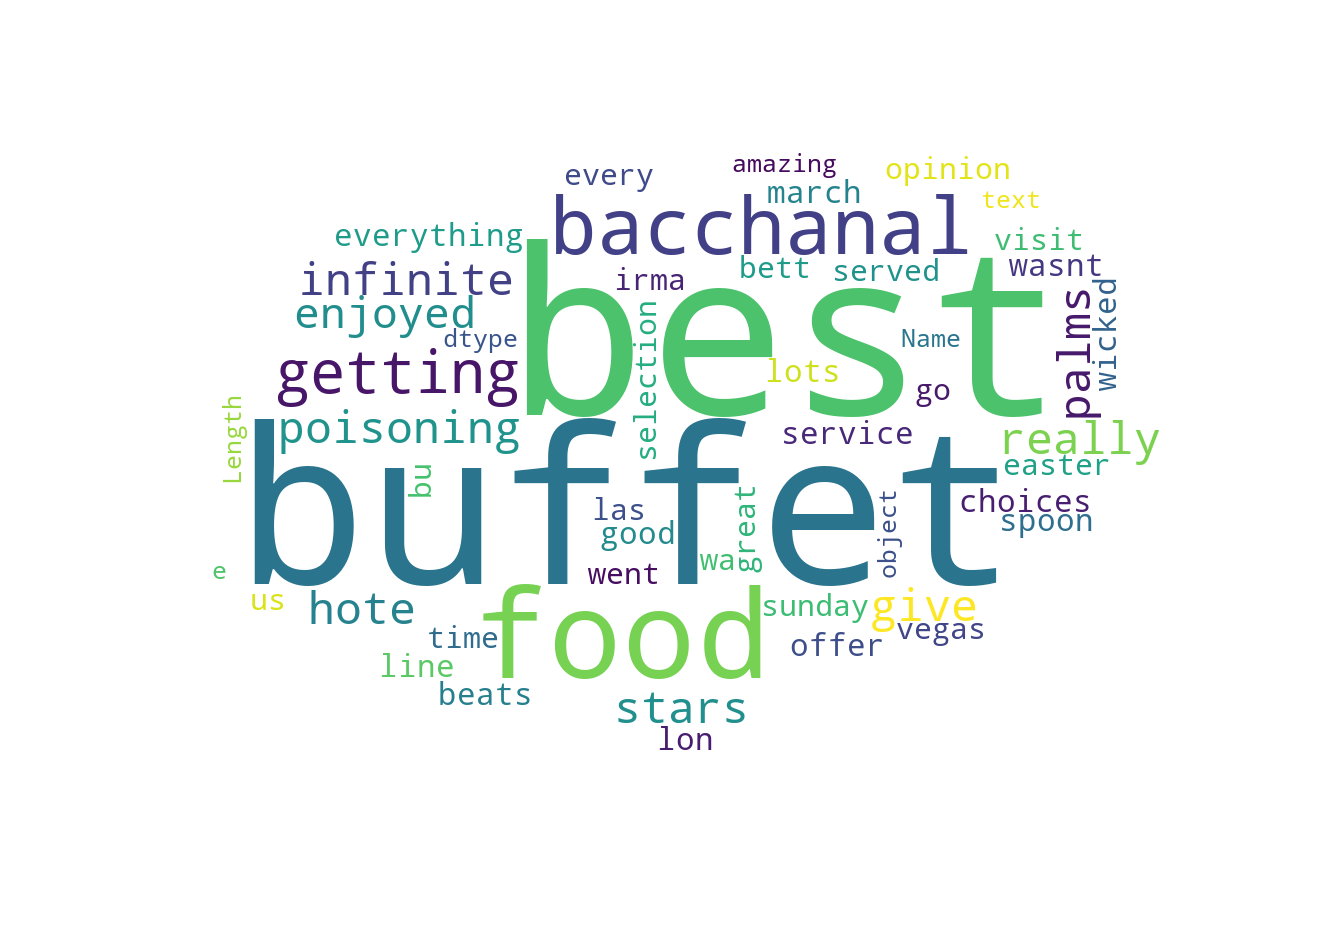

In [108]:
create_wordcloud(text5.text)

In [45]:
df.user_id.nunique()

10129

In [48]:
df['year']=pd.DatetimeIndex(df["date"]).year

In [49]:
df2=pd.DataFrame(df.groupby("year").stars.mean())

<AxesSubplot:xlabel='year', ylabel='stars'>

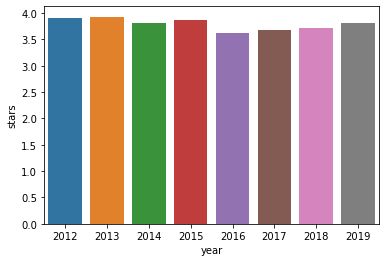

In [50]:
sns.barplot(df2.index,df2.stars)

In [51]:
df['month']=pd.DatetimeIndex(df["date"]).month

In [52]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,2012,12
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,2014,1
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,2015,6
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,2016,12
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,2019,11
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,2019,11
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,2019,12
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,2019,11


<AxesSubplot:xlabel='stars', ylabel='count'>

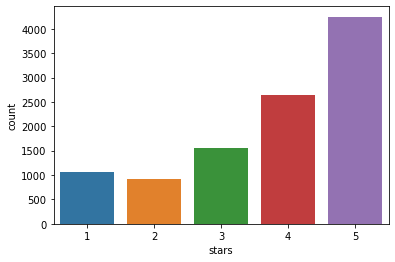

In [18]:
sns.countplot(x=df['stars']) 

In [24]:
restbw=df[(df.stars==1)|(df.stars==5)]  
#1 ve 5 yıldızları ayrıdım

In [25]:
restbw.reset_index(drop=True, inplace=True)  

In [26]:
restbw.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18
1,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29
2,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17
3,2370586,gmZJrnsIpYIrhPBsaAVjIw,mCHQQxluggGNYOKqpiR94g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01 16:18:34
4,2371005,9n4EEhhLlaLDX3QQFVoHMw,or1TN9s4LSRfBF6kmzmb5g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27 00:42:19


In [27]:
restbw   

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18
1,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29
2,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17
3,2370586,gmZJrnsIpYIrhPBsaAVjIw,mCHQQxluggGNYOKqpiR94g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01 16:18:34
4,2371005,9n4EEhhLlaLDX3QQFVoHMw,or1TN9s4LSRfBF6kmzmb5g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27 00:42:19
...,...,...,...,...,...,...,...,...,...,...
5298,3219831,--Rcc25wmvC2YikMKO1duQ,EKLCM0XAOTq14wNnuMAGWA,RESDUcs7fIiihp38-d6_6g,5,1,0,0,we went to bacchanal on easter sunday as it wa...,2019-04-28 18:59:53
5299,3219849,LbMPx0u9mAcaVDOYiiArsQ,0wNZkuUFDnMA_8YP_PE3Zw,RESDUcs7fIiihp38-d6_6g,1,0,0,0,came him from la thanksgiving week we decided ...,2019-12-05 18:01:49
5300,3219894,ErLDRaBYPyt8x6DkJuY9TA,YhLSS4TmTFuQOrN4RAUlBw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,every time we visit las vegas we go to this bu...,2019-12-05 21:34:56
5301,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36


In [109]:
def sentiment_detect(text):
    return TextBlob(text).sentiment.polarity

In [110]:
df['sentiment']=df['text'].apply(sentiment_detect)

In [112]:
df['text'].duplicated().sum()

27

In [113]:
df.drop_duplicates(subset="text", inplace=True)

In [114]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,language,polarity,subjectivity,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,en,0.337330,0.586926,0.337330
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,en,0.219409,0.537292,0.219409
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,en,-0.134722,0.731944,-0.134722
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,en,-0.325000,0.400000,-0.325000
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,en,0.362500,0.725000,0.362500


In [115]:
df["text"]=df["text"].str.replace('[^a.zA-Z0-9\s]','')

In [116]:
df["text"]=df["text"].str.lower()

In [117]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarıkaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
from nltk.corpus import stopwords
stopwords= nltk.corpus.stopwords.words('english')


In [119]:
df['text']=df['text'].apply(lambda x: [word for word in x if word not in stopwords])

In [131]:
x=restbw["text"]
y=restbw["stars"]

In [132]:
vect=CountVectorizer()

In [133]:
x=vect.fit_transform(x)

In [31]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42, test_size=.20)

In [134]:
x_train  

<4242x19743 sparse matrix of type '<class 'numpy.int64'>'
	with 196555 stored elements in Compressed Sparse Row format>

In [136]:
l=LogisticRegression()

In [137]:
l.fit(x_train,y_train) 

LogisticRegression()

In [138]:
pred=l.predict(x_test)

In [139]:
accuracy_score(pred,y_test)  

0.9481621112158342

In [140]:
m=MultinomialNB()

In [141]:
pred2=m.fit(x_train,y_train).predict(x_test) 

In [142]:
accuracy_score(pred2,y_test)

0.9321394910461829